# Buu NGUYEN and Amr MOHAMED

In [1]:
# import libraries
import matplotlib.pyplot as plt
import networkx as nx

# Small World Network

In [2]:
n_node = 14
k_degree = 4
p_beta = 0.5

In [3]:
# Calculate centralities
def centrality(G):
    return nx.betweenness_centrality(G)

## Regular Graph

In [4]:
def regular_graph():
    global n_node
    global k_degree
    
    G = nx.Graph()
    nodes = list(range(n_node)) # nodes are labeled 0 to n-1
    
    # connect each node to k_degree / 2 neighbors
    for i in range(1, k_degree // 2+1):
        targets = nodes[i:] + nodes[0:i] # first i nodes are now last in list
        G.add_edges_from(zip(nodes,targets))
        
    return G, nodes

In [5]:
(G, nodes) = regular_graph()
pos = nx.circular_layout(G)

nx.draw_networkx(G, pos, node_size = 500, alpha = 0.5, node_color = 'green', with_labels=True)
plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


#### Average shortest path length

In [6]:
print(nx.average_shortest_path_length(G))

2.1538461538461537


#### Clustering coefficient

In [7]:
print(nx.average_clustering(G))

0.5


In [8]:
# Calculate centralities
centrality(G)

{0: 0.09615384615384615,
 1: 0.09615384615384615,
 2: 0.09615384615384615,
 3: 0.09615384615384615,
 4: 0.09615384615384615,
 5: 0.09615384615384615,
 6: 0.09615384615384615,
 7: 0.09615384615384615,
 8: 0.09615384615384615,
 9: 0.09615384615384615,
 10: 0.09615384615384615,
 11: 0.09615384615384615,
 12: 0.09615384615384615,
 13: 0.09615384615384615}

## Watts-Strogatz Model

In [9]:
import random

def watts_strogatz(G, nodes):
    # rewire edges from each node
    # loop over all nodes in order (label) and neighbors in order (distance)
    # no self loops or multiple edges allowed
    
    global n_node
    global k_degreeW
    global p_beta
    
    for i in range(1, k_degree // 2 + 1): # outer loop is neighbors
        targets = nodes[i:] + nodes[0:i] # first i nodes are now last in list
        # inner loop in node orderW
        for u,v in zip(nodes,targets):
            if random.random() < p_beta:
                w = random.choice(nodes)
                # Enforce no self-loops or multiple edges
                while w == u or G.has_edge(u, w):
                    w = random.choice(nodes)
                    if G.degree(u) >= n_node - 1:
                        break # skip this rewiring
                else:
                    G.remove_edge(u,v)
                    G.add_edge(u,w)
    return G

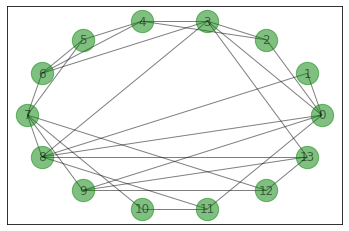

In [10]:
G_smallworld = watts_strogatz(G, nodes)
pos = nx.circular_layout(G_smallworld)

nx.draw_networkx(G_smallworld, pos, node_size = 500, alpha = 0.5, node_color = 'green', with_labels=True)
plt.show()

#### Average shortest path length

In [11]:
print(nx.average_shortest_path_length(G_smallworld))

1.901098901098901


#### Clustering coefficient

In [12]:
print(nx.average_clustering(G_smallworld))

0.4285714285714285


In [13]:
# Calculate centralities
centrality(G_smallworld)

{0: 0.1685897435897436,
 1: 0.0,
 2: 0.020085470085470087,
 3: 0.15641025641025638,
 4: 0.03760683760683761,
 5: 0.021794871794871797,
 6: 0.045085470085470085,
 7: 0.24551282051282047,
 8: 0.17393162393162392,
 9: 0.05213675213675213,
 10: 0.019230769230769232,
 11: 0.0502136752136752,
 12: 0.010042735042735042,
 13: 0.05064102564102563}